In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11043,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969797e+07,1.969797e+07,False,NaN,1,NaN,NaN,None,2024-05-13T23:03:00.000Z,62725.852438,2.789459e+10,104.8558,-0.314540,2.350129,-1.198814,-3.168213,-12.148394,26.735718,1.235572e+12,53.8922,1.317243e+12,None,2024-05-13T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
1,1027,Ethereum,ETH,ethereum,8919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201133e+08,1.201133e+08,True,NaN,2,NaN,NaN,None,2024-05-13T23:02:00.000Z,2942.742929,1.326786e+10,123.5863,-0.340225,0.428841,-4.497237,-3.097020,-23.996811,11.738965,3.534625e+11,15.4147,3.534625e+11,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
2,825,Tether USDt,USDT,tether,85243,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-13T23:02:00.000Z,1.000124,5.313550e+10,106.7176,0.013090,0.063591,0.006411,-0.107147,0.047136,-0.040820,1.108537e+11,4.8344,1.131006e+11,None,2024-05-13T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 23:04:35.634387
3,1839,BNB,BNB,bnb,2156,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475868e+08,1.475868e+08,False,NaN,4,NaN,NaN,None,2024-05-13T23:02:00.000Z,592.025574,1.638550e+09,29.0309,-0.237533,-0.481569,0.183599,6.350997,-1.841572,82.306184,8.737513e+10,3.8111,8.737513e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.485326e+08,5.758535e+08,True,NaN,5,NaN,NaN,None,2024-05-13T23:02:00.000Z,147.009664,2.538543e+09,171.9332,-0.536406,2.637991,-4.849358,3.702122,-14.904987,31.178444,6.593863e+10,2.8761,8.465603e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
5,3408,USDC,USDC,usd-coin,19066,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.307915e+10,3.307915e+10,False,NaN,6,NaN,NaN,None,2024-05-13T23:02:00.000Z,1.000285,5.483292e+09,115.0542,0.014889,0.028843,0.034307,0.023260,0.049845,0.021338,3.308858e+10,1.4432,3.308858e+10,None,2024-05-13T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-13 23:04:35.634387
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-13T23:03:00.000Z,0.504341,9.914724e+08,151.0521,-0.106141,0.977322,-6.981230,5.861340,-24.612619,-4.094032,2.791992e+10,1.2182,5.043413e+10,None,2024-05-13T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
7,11419,Toncoin,TON,toncoin,317,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474033e+09,5.106559e+09,True,NaN,8,3.414167e+09,2.405960e+10,None,2024-05-13T23:02:00.000Z,7.046990,8.360700e+08,182.1870,-0.362253,1.689094,21.131574,15.347261,74.497523,224.171103,2.448148e+10,1.0678,3.598587e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thall\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\thall\AppData\Local\Temp\ipykernel_2196\2297191070.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11043,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969797e+07,1.969797e+07,False,NaN,1,NaN,NaN,None,2024-05-13T23:03:00.000Z,62725.852438,2.789459e+10,104.8558,-0.314540,2.350129,-1.198814,-3.168213,-12.148394,26.735718,1.235572e+12,53.8922,1.317243e+12,None,2024-05-13T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
1,1027,Ethereum,ETH,ethereum,8919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201133e+08,1.201133e+08,True,NaN,2,NaN,NaN,None,2024-05-13T23:02:00.000Z,2942.742929,1.326786e+10,123.5863,-0.340225,0.428841,-4.497237,-3.097020,-23.996811,11.738965,3.534625e+11,15.4147,3.534625e+11,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
2,825,Tether USDt,USDT,tether,85243,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-13T23:02:00.000Z,1.000124,5.313550e+10,106.7176,0.013090,0.063591,0.006411,-0.107147,0.047136,-0.040820,1.108537e+11,4.8344,1.131006e+11,None,2024-05-13T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 23:04:35.634387,NaT
3,1839,BNB,BNB,bnb,2156,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475868e+08,1.475868e+08,False,NaN,4,NaN,NaN,None,2024-05-13T23:02:00.000Z,592.025574,1.638550e+09,29.0309,-0.237533,-0.481569,0.183599,6.350997,-1.841572,82.306184,8.737513e+10,3.8111,8.737513e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.485326e+08,5.758535e+08,True,NaN,5,NaN,NaN,None,2024-05-13T23:02:00.000Z,147.009664,2.538543e+09,171.9332,-0.536406,2.637991,-4.849358,3.702122,-14.904987,31.178444,6.593863e+10,2.8761,8.465603e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
5,3408,USDC,USDC,usd-coin,19066,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.307915e+10,3.307915e+10,False,NaN,6,NaN,NaN,None,2024-05-13T23:02:00.000Z,1.000285,5.483292e+09,115.0542,0.014889,0.028843,0.034307,0.023260,0.049845,0.021338,3.308858e+10,1.4432,3.308858e+10,None,2024-05-13T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-13 23:04:35.634387,NaT
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-13T23:03:00.000Z,0.504341,9.914724e+08,151.0521,-0.106141,0.977322,-6.981230,5.861340,-24.612619,-4.094032,2.791992e+10,1.2182,5.043413e+10,None,2024-05-13T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
7,11419,Toncoin,TON,toncoin,317,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474033e+09,5.106559e+09,True,NaN,8,3.414167e+09,2.405960e+10,None,2024-05-13T23:02:00.000Z,7.046990,8.360700e+08,182.1870,-0.362253,1.689094,21.131574,15.347261,74.497523,224.171103,2.448148e+10,1.0678,3.598587e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
8,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[

In [8]:
df.head

<bound method NDFrame.head of        id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11043   
1    1027      Ethereum    ETH      ethereum              8919   
2     825   Tether USDt   USDT        tether             85243   
3    1839           BNB    BNB           bnb              2156   
4    5426        Solana    SOL        solana               657   
5    3408          USDC   USDC      usd-coin             19066   
6      52           XRP    XRP           xrp              1314   
7   11419       Toncoin    TON       toncoin               317   
8      74      Dogecoin   DOGE      dogecoin               964   
9    2010       Cardano    ADA       cardano              1167   
10   5994     Shiba Inu   SHIB     shiba-inu               806   
11   5805     Avalanche   AVAX     avalanche               720   
12   1958          TRON    TRX          tron               972   
13   6636      Polkadot    DOT  polkadot-new  

In [9]:
df.dtypes

id                                             int64
name                                          object
symbol                                        object
slug                                          object
num_market_pairs                               int64
date_added                                    object
tags                                          object
max_supply                                   float64
circulating_supply                           float64
total_supply                                 float64
infinite_supply                                 bool
platform                                     float64
cmc_rank                                       int64
self_reported_circulating_supply             float64
self_reported_market_cap                     float64
tvl_ratio                                     object
last_updated                                  object
quote.USD.price                              float64
quote.USD.volume_24h                         f

In [10]:
df.describe

<bound method NDFrame.describe of        id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11043   
1    1027      Ethereum    ETH      ethereum              8919   
2     825   Tether USDt   USDT        tether             85243   
3    1839           BNB    BNB           bnb              2156   
4    5426        Solana    SOL        solana               657   
5    3408          USDC   USDC      usd-coin             19066   
6      52           XRP    XRP           xrp              1314   
7   11419       Toncoin    TON       toncoin               317   
8      74      Dogecoin   DOGE      dogecoin               964   
9    2010       Cardano    ADA       cardano              1167   
10   5994     Shiba Inu   SHIB     shiba-inu               806   
11   5805     Avalanche   AVAX     avalanche               720   
12   1958          TRON    TRX          tron               972   
13   6636      Polkadot    DOT  polkadot-n

In [11]:
df.shape

(135, 38)

In [13]:
df.isnull().sum()

id                                      0
name                                    0
symbol                                  0
slug                                    0
num_market_pairs                        0
date_added                              0
tags                                    0
max_supply                             90
circulating_supply                      0
total_supply                            0
infinite_supply                         0
platform                              135
cmc_rank                                0
self_reported_circulating_supply      108
self_reported_market_cap              108
tvl_ratio                             135
last_updated                            0
quote.USD.price                         0
quote.USD.volume_24h                    0
quote.USD.volume_change_24h             0
quote.USD.percent_change_1h             0
quote.USD.percent_change_24h            0
quote.USD.percent_change_7d             0
quote.USD.percent_change_30d      

In [20]:
df.dropna

<bound method DataFrame.dropna of        id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11043   
1    1027      Ethereum    ETH      ethereum              8919   
2     825   Tether USDt   USDT        tether             85243   
3    1839           BNB    BNB           bnb              2156   
4    5426        Solana    SOL        solana               657   
5    3408          USDC   USDC      usd-coin             19066   
6      52           XRP    XRP           xrp              1314   
7   11419       Toncoin    TON       toncoin               317   
8      74      Dogecoin   DOGE      dogecoin               964   
9    2010       Cardano    ADA       cardano              1167   
10   5994     Shiba Inu   SHIB     shiba-inu               806   
11   5805     Avalanche   AVAX     avalanche               720   
12   1958          TRON    TRX          tron               972   
13   6636      Polkadot    DOT  polkadot-n

In [21]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11043,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.969797e+07,1.969797e+07,False,NaN,1,NaN,NaN,None,2024-05-13T23:03:00.000Z,62725.852438,2.789459e+10,104.8558,-0.314540,2.350129,-1.198814,-3.168213,-12.148394,26.735718,1.235572e+12,53.8922,1.317243e+12,None,2024-05-13T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
1,1027,Ethereum,ETH,ethereum,8919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201133e+08,1.201133e+08,True,NaN,2,NaN,NaN,None,2024-05-13T23:02:00.000Z,2942.742929,1.326786e+10,123.5863,-0.340225,0.428841,-4.497237,-3.097020,-23.996811,11.738965,3.534625e+11,15.4147,3.534625e+11,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
2,825,Tether USDt,USDT,tether,85243,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.108400e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-13T23:02:00.000Z,1.000124,5.313550e+10,106.7176,0.013090,0.063591,0.006411,-0.107147,0.047136,-0.040820,1.108537e+11,4.8344,1.131006e+11,None,2024-05-13T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-13 23:04:35.634387,NaT
3,1839,BNB,BNB,bnb,2156,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475868e+08,1.475868e+08,False,NaN,4,NaN,NaN,None,2024-05-13T23:02:00.000Z,592.025574,1.638550e+09,29.0309,-0.237533,-0.481569,0.183599,6.350997,-1.841572,82.306184,8.737513e+10,3.8111,8.737513e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.485326e+08,5.758535e+08,True,NaN,5,NaN,NaN,None,2024-05-13T23:02:00.000Z,147.009664,2.538543e+09,171.9332,-0.536406,2.637991,-4.849358,3.702122,-14.904987,31.178444,6.593863e+10,2.8761,8.465603e+10,None,2024-05-13T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-13 23:04:35.634387,NaT


In [23]:
df.shape

(135, 38)

In [25]:
df.duplicated().sum()

TypeError: unhashable type: 'list'

In [26]:
df.drop_duplicates()

TypeError: unhashable type: 'list'

In [27]:
type(df)

pandas.core.frame.DataFrame

In [29]:
#Visualizing coin trend over time
#Aggregating values and extracting only the necessary columns
df2 = df.groupby('name', sort =False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [30]:
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.236370,2.362334,-1.069454,-3.421124,-12.182715,26.924576
Ethereum,-0.258006,0.431504,-4.408079,-3.235168,-24.102181,11.859691
Tether USDt,-0.007035,0.038517,-0.031856,-0.133165,0.030809,-0.061342
BNB,-0.205221,-0.492431,0.236486,5.947624,-1.901819,82.319414
Solana,-0.392207,2.710420,-4.634191,4.042308,-14.918598,31.383328
USDC,-0.004713,0.011385,-0.004781,0.008452,0.018580,0.004024
XRP,-0.021597,1.026643,-6.857276,5.713519,-24.602966,-3.912199
Toncoin,-0.437678,1.600791,21.140269,15.351515,74.359669,223.894640
Dogecoin,-0.577865,5.195579,-5.701473,-3.466446,-16.184100,82.833051


In [33]:
df3 = df2.stack()

In [34]:
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      -0.236370
              quote.USD.percent_change_24h      2.362334
              quote.USD.percent_change_7d      -1.069454
              quote.USD.percent_change_30d     -3.421124
              quote.USD.percent_change_60d    -12.182715
              quote.USD.percent_change_90d     26.924576
Ethereum      quote.USD.percent_change_1h      -0.258006
              quote.USD.percent_change_24h      0.431504
              quote.USD.percent_change_7d      -4.408079
              quote.USD.percent_change_30d     -3.235168
              quote.USD.percent_change_60d    -24.102181
              quote.USD.percent_change_90d     11.859691
Tether USDt   quote.USD.percent_change_1h      -0.007035
              quote.USD.percent_change_24h      0.038517
              quote.USD.percent_change_7d      -0.031856
              quote.USD.percent_change_30d     -0.133165
              quote.USD.percent_change_60d   

In [93]:
df4 = df3.to_frame(name = 'values')

In [94]:
df4

values
name                                                 
Bitcoin      quote.USD.percent_change_1h    -0.236370
             quote.USD.percent_change_24h    2.362334
             quote.USD.percent_change_7d    -1.069454
             quote.USD.percent_change_30d   -3.421124
             quote.USD.percent_change_60d  -12.182715
             quote.USD.percent_change_90d   26.924576
Ethereum     quote.USD.percent_change_1h    -0.258006
             quote.USD.percent_change_24h    0.431504
             quote.USD.percent_change_7d    -4.408079
             quote.USD.percent_change_30d   -3.235168
             quote.USD.percent_change_60d  -24.102181
             quote.USD.percent_change_90d   11.859691
Tether USDt  quote.USD.percent_change_1h    -0.007035
             quote.USD.percent_change_24h    0.038517
             quote.USD.percent_change_7d    -0.031856
             quote.USD.percent_change_30d   -0.133165
             quote.USD.percent_change_60d    0.030809
             quote.USD.percent_change_90d   -0.061342
BNB          quote.USD.percent_change_1h    -0.205221
             quote.USD.percent_change_24h   -0.492431
             quote.USD.percent_change_7d     0.236486
             quote.USD.percent_change_30d    5.947624
             quote.USD.percent_change_60d   -1.901819
             quote.USD.percent_change_90d   82.319414
Solana       quote.USD.percent_change_1h    -0.392207
             quote.USD.percent_change_24h    2.710420
             quote.USD.percent_change_7d    -4.634191
             quote.USD.percent_change_30d    4.042308
             quote.USD.percent_change_60d  -14.918598
             quote.USD.percent_change_90d   31.383328
USDC         quote.USD.percent_change_1h    -0.004713
             quote.USD.percent_change_24h    0.011385
             quote.USD.percent_change_7d    -0.004781
             quote.USD.percent_change_30d    0.008452
             quote.USD.percent_change_60d    0.018580
             quote.USD.percent_change_90d    0.004024
XRP          quote.USD.percent_change_1h    -0.021597
             quote.USD.percent_change_24h    1.026643
             quote.USD.percent_change_7d    -6.857276
             quote.USD.percent_change_30d    5.713519
             quote.USD.percent_change_60d  -24.602966
             quote.USD.percent_change_90d   -3.912199
Toncoin      quote.USD.percent_change_1h    -0.437678
             quote.USD.percent_change_24h    1.600791
             quote.USD.percent_change_7d    21.140269
             quote.USD.percent_change_30d   15.351515
             quote.USD.percent_change_60d   74.359669
             quote.USD.percent_change_90d  223.894640
Dogecoin     quote.USD.percent_change_1h    -0.577865
             quote.USD.percent_change_24h    5.195579
             quote.USD.percent_change_7d    -5.701473
             quote.USD.percent_change_30d   -3.466446
             quote.USD.percent_change_60d  -16.184100
             quote.USD.percent_change_90d   82.833051
Cardano      quote.USD.percent_change_1h    -0.567014
             quote.USD.percent_change_24h   -0.011311
             quote.USD.percent_change_7d    -4.161253
             quote.USD.percent_change_30d   -2.392180
             quote.USD.percent_change_60d  -41.691591
             quote.USD.percent_change_90d  -19.663242
Shiba Inu    quote.USD.percent_change_1h    -0.282721
             quote.USD.percent_change_24h    4.189424
             quote.USD.percent_change_7d    -3.234460
             quote.USD.percent_change_30d    9.822251
             quote.USD.percent_change_60d  -27.978788
             quote.USD.percent_change_90d  145.802232
Avalanche    quote.USD.percent_change_1h    -0.637673
             quote.USD.percent_change_24h   -2.237492
             quote.USD.percent_change_7d   -13.175769
             quote.USD.percent_change_30d   -5.043714
             quote.USD.percent_change_60d  -39.806126
             quote.USD.percent_change_90d  -18.034455
TRON         quote.USD.percent_change_1h    -0.1931

In [95]:
df4.count()

values    90
dtype: int64

In [96]:
df4

values
name                                                 
Bitcoin      quote.USD.percent_change_1h    -0.236370
             quote.USD.percent_change_24h    2.362334
             quote.USD.percent_change_7d    -1.069454
             quote.USD.percent_change_30d   -3.421124
             quote.USD.percent_change_60d  -12.182715
             quote.USD.percent_change_90d   26.924576
Ethereum     quote.USD.percent_change_1h    -0.258006
             quote.USD.percent_change_24h    0.431504
             quote.USD.percent_change_7d    -4.408079
             quote.USD.percent_change_30d   -3.235168
             quote.USD.percent_change_60d  -24.102181
             quote.USD.percent_change_90d   11.859691
Tether USDt  quote.USD.percent_change_1h    -0.007035
             quote.USD.percent_change_24h    0.038517
             quote.USD.percent_change_7d    -0.031856
             quote.USD.percent_change_30d   -0.133165
             quote.USD.percent_change_60d    0.030809
             quote.USD.percent_change_90d   -0.061342
BNB          quote.USD.percent_change_1h    -0.205221
             quote.USD.percent_change_24h   -0.492431
             quote.USD.percent_change_7d     0.236486
             quote.USD.percent_change_30d    5.947624
             quote.USD.percent_change_60d   -1.901819
             quote.USD.percent_change_90d   82.319414
Solana       quote.USD.percent_change_1h    -0.392207
             quote.USD.percent_change_24h    2.710420
             quote.USD.percent_change_7d    -4.634191
             quote.USD.percent_change_30d    4.042308
             quote.USD.percent_change_60d  -14.918598
             quote.USD.percent_change_90d   31.383328
USDC         quote.USD.percent_change_1h    -0.004713
             quote.USD.percent_change_24h    0.011385
             quote.USD.percent_change_7d    -0.004781
             quote.USD.percent_change_30d    0.008452
             quote.USD.percent_change_60d    0.018580
             quote.USD.percent_change_90d    0.004024
XRP          quote.USD.percent_change_1h    -0.021597
             quote.USD.percent_change_24h    1.026643
             quote.USD.percent_change_7d    -6.857276
             quote.USD.percent_change_30d    5.713519
             quote.USD.percent_change_60d  -24.602966
             quote.USD.percent_change_90d   -3.912199
Toncoin      quote.USD.percent_change_1h    -0.437678
             quote.USD.percent_change_24h    1.600791
             quote.USD.percent_change_7d    21.140269
             quote.USD.percent_change_30d   15.351515
             quote.USD.percent_change_60d   74.359669
             quote.USD.percent_change_90d  223.894640
Dogecoin     quote.USD.percent_change_1h    -0.577865
             quote.USD.percent_change_24h    5.195579
             quote.USD.percent_change_7d    -5.701473
             quote.USD.percent_change_30d   -3.466446
             quote.USD.percent_change_60d  -16.184100
             quote.USD.percent_change_90d   82.833051
Cardano      quote.USD.percent_change_1h    -0.567014
             quote.USD.percent_change_24h   -0.011311
             quote.USD.percent_change_7d    -4.161253
             quote.USD.percent_change_30d   -2.392180
             quote.USD.percent_change_60d  -41.691591
             quote.USD.percent_change_90d  -19.663242
Shiba Inu    quote.USD.percent_change_1h    -0.282721
             quote.USD.percent_change_24h    4.189424
             quote.USD.percent_change_7d    -3.234460
             quote.USD.percent_change_30d    9.822251
             quote.USD.percent_change_60d  -27.978788
             quote.USD.percent_change_90d  145.802232
Avalanche    quote.USD.percent_change_1h    -0.637673
             quote.USD.percent_change_24h   -2.237492
             quote.USD.percent_change_7d   -13.175769
             quote.USD.percent_change_30d   -5.043714
             quote.USD.percent_change_60d  -39.806126
             quote.USD.percent_change_90d  -18.034455
TRON         quote.USD.percent_change_1h    -0.1931

In [97]:
index = pd.Index(range(90))

In [98]:
df4_with_new_index = df4.copy()

In [99]:
df4_with_new_index.reset_index(inplace=True)

In [100]:
df4_with_new_index.index = index

In [101]:
df4_with_new_index

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.236370
1,Bitcoin,quote.USD.percent_change_24h,2.362334
2,Bitcoin,quote.USD.percent_change_7d,-1.069454
3,Bitcoin,quote.USD.percent_change_30d,-3.421124
4,Bitcoin,quote.USD.percent_change_60d,-12.182715
5,Bitcoin,quote.USD.percent_change_90d,26.924576
6,Ethereum,quote.USD.percent_change_1h,-0.258006
7,Ethereum,quote.USD.percent_change_24h,0.431504
8,Ethereum,quote.USD.percent_change_7d,-4.408079
9,Ethereum,quote.USD.percent_change_30d,-3.235168


In [102]:
df5 = df4_with_new_index

In [103]:
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.236370
1,Bitcoin,quote.USD.percent_change_24h,2.362334
2,Bitcoin,quote.USD.percent_change_7d,-1.069454
3,Bitcoin,quote.USD.percent_change_30d,-3.421124
4,Bitcoin,quote.USD.percent_change_60d,-12.182715
5,Bitcoin,quote.USD.percent_change_90d,26.924576
6,Ethereum,quote.USD.percent_change_1h,-0.258006
7,Ethereum,quote.USD.percent_change_24h,0.431504
8,Ethereum,quote.USD.percent_change_7d,-4.408079
9,Ethereum,quote.USD.percent_change_30d,-3.235168


In [109]:
df5.rename(columns ={'level_1': 'Percent_change'}, inplace = True)

In [110]:
df5

,name,Percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.236370
1,Bitcoin,quote.USD.percent_change_24h,2.362334
2,Bitcoin,quote.USD.percent_change_7d,-1.069454
3,Bitcoin,quote.USD.percent_change_30d,-3.421124
4,Bitcoin,quote.USD.percent_change_60d,-12.182715
5,Bitcoin,quote.USD.percent_change_90d,26.924576
6,Ethereum,quote.USD.percent_change_1h,-0.258006
7,Ethereum,quote.USD.percent_change_24h,0.431504
8,Ethereum,quote.USD.percent_change_7d,-4.408079
9,Ethereum,quote.USD.percent_change_30d,-3.235168


In [113]:
df5['Percent_change'] = df5['Percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_1h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','1h','7d','30d','60d','90d'])
df5

,name,Percent_change,values
0,Bitcoin,1h,-0.236370
1,Bitcoin,24h,2.362334
2,Bitcoin,7d,-1.069454
3,Bitcoin,30d,-3.421124
4,Bitcoin,60d,-12.182715
5,Bitcoin,90d,26.924576
6,Ethereum,1h,-0.258006
7,Ethereum,24h,0.431504
8,Ethereum,7d,-4.408079
9,Ethereum,30d,-3.235168


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

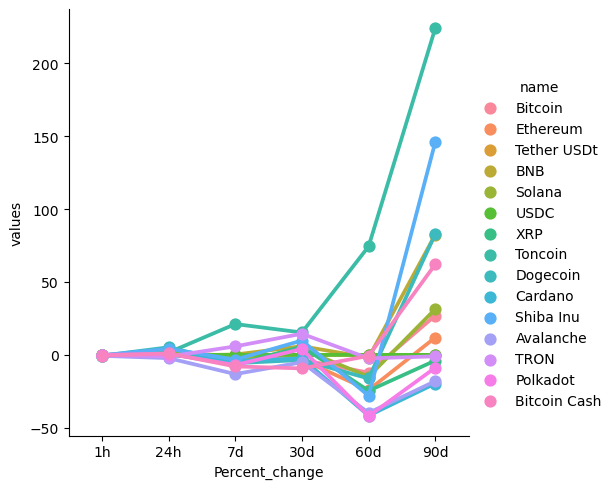

In [116]:
sns.catplot(x='Percent_change', y='values', hue='name', data=df5, kind='point')